# **Simple Neural Network**

In [1]:
import pandas as pd
import seaborn as sns
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
import seaborn as sns
import matplotlib.pyplot as plt
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense

# **Preprocessing**

Here’s a concise description for each column in the Titanic dataset:

1. **survived**: Integer (0 = died, 1 = survived) showing if the passenger survived.
2. **pclass**: Integer (1 = 1st, 2 = 2nd, 3 = 3rd) indicating ticket class.
3. **sex**: String ("male" or "female") specifying passenger gender.
4. **age**: Float (e.g., 0.42–80) representing passenger age, with some NaN values.
5. **sibsp**: Integer (0–8) counting siblings/spouses aboard.
6. **parch**: Integer (0–6) counting parents/children aboard.
7. **fare**: Float (e.g., 0–512.3292) showing ticket cost in pounds.
8. **embarked**: String ("C", "Q", "S") for port embarked (Cherbourg, Queenstown, Southampton).
9. **class**: Categorical ("First", "Second", "Third") mirroring pclass.
10. **who**: String ("man", "woman", "child") categorizing by age and sex.
11. **adult_male**: Boolean (True/False) indicating if passenger is an adult male.
12. **deck**: Categorical ("A"–"G" or NaN) showing cabin deck level.
13. **embark_town**: String ("Cherbourg", "Queenstown", "Southampton") naming embarkation port.
14. **alive**: String ("no" or "yes") stating survival status.
15. **alone**: Boolean (True/False) showing if passenger traveled solo.

In [2]:
# load the titanic dataset
titanic = sns.load_dataset('titanic')
titanic

,survived,pclass,sex,age,sibsp,parch,fare,embarked,class,who,adult_male,deck,embark_town,alive,alone
0,0,3,male,22.0,1,0,7.2500,S,Third,man,True,NaN,Southampton,no,False
1,1,1,female,38.0,1,0,71.2833,C,First,woman,False,C,Cherbourg,yes,False
2,1,3,female,26.0,0,0,7.9250,S,Third,woman,False,NaN,Southampton,yes,True
3,1,1,female,35.0,1,0,53.1000,S,First,woman,False,C,Southampton,yes,False
4,0,3,male,35.0,0,0,8.0500,S,Third,man,True,NaN,Southampton,no,True
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
886,0,2,male,27.0,0,0,13.0000,S,Second,man,True,NaN,Southampton,no,True
887,1,1,female,19.0,0,0,30.0000,S,First,woman,False,B,Southampton,yes,True
888,0,3,female,NaN,1,2,23.4500,S,Third,woman,False,NaN,Southampton,no,False
889,1,1,male,26.0,0,0,30.0000,C,First,man,True,C,Cherbourg,yes,True


In [3]:
# Check missing calues in each column
titanic.isnull().sum()

survived         0
pclass           0
sex              0
age            177
sibsp            0
parch            0
fare             0
embarked         2
class            0
who              0
adult_male       0
deck           688
embark_town      2
alive            0
alone            0
dtype: int64

In [4]:
print(titanic.columns)

Index(['survived', 'pclass', 'sex', 'age', 'sibsp', 'parch', 'fare',
       'embarked', 'class', 'who', 'adult_male', 'deck', 'embark_town',
       'alive', 'alone'],
      dtype='object')


### **Handling missing values in the Titanic dataset depends on the nature of the data and the amount of missing values. Let's go column by column:**

---

### **1. `age` (177 missing values) - Numerical Feature**  
  **Approach: Imputation (Fill Missing Values)**  
- Since age is a **continuous** numerical variable, we can fill missing values using:  
  - **Mean Age** (if data is normally distributed).  
  - **Median Age** (if data has outliers).  
  - **Predict Age using other features** (e.g., Name titles, Pclass, SibSp).  

✔ **Filling with Median:**  
```python
titanic['age'].fillna(titanic['age'].median(), inplace=True)
```

✔ **Filling with Grouped Median (Based on Pclass & Sex):**  
```python
titanic['age'] = titanic.groupby(['pclass', 'sex'])['age'].apply(lambda x: x.fillna(x.median()))
```

---

### **2. `embarked` (2 missing values) - Categorical Feature**  
  **Approach: Fill with Most Frequent Value (Mode)**  
- Since only **2 values** are missing, the best approach is to fill them with the most common embarkation port.

✔ **Filling with Mode (Most Frequent Value):**  
```python
titanic['embarked'].fillna(titanic['embarked'].mode()[0], inplace=True)
```

---

### **3. `deck` (688 missing values) - Categorical Feature (Too Many Missing Values)**  
  **Approach: Drop or Create a New Category**  
- **Option 1: Drop the Column** (Too many missing values, nearly **77% missing**).  
```python
titanic.drop(columns=['deck'], inplace=True)
```
- **Option 2: Replace NaN with "Unknown"** (To retain information).  
```python
titanic['deck'].fillna('Unknown', inplace=True)
```

---

### **4. `embark_town` (2 missing values) - Categorical Feature**  
  **Approach: Fill with Mode (Same as `embarked`)**  
✔ **Fill with Mode:**  
```python
titanic['embark_town'].fillna(titanic['embark_town'].mode()[0], inplace=True)
```

---

### **Final Check for Missing Values**  
After applying these fixes, re-check for missing values:
```python
print(titanic.isnull().sum())
```

---

### **Summary of Handling Methods:**  
| Column          | Data Type   | Missing Values | Handling Approach |
|---------------|------------|----------------|-------------------|
| `age`          | Numerical  | 177            | Fill with **median** or **grouped median** |
| `embarked`     | Categorical | 2             | Fill with **mode** (most common value) |
| `deck`         | Categorical | 688           | **Drop** or fill with "Unknown" |
| `embark_town`  | Categorical | 2             | Fill with **mode** |

----------------------------------------------------------------------------------------------
### **Mean, Median, and Mode – Explained Simply**  

These are **measures of central tendency** used in statistics to describe a dataset.

---

### **1. Mean (Average)**  
- The **mean** is the sum of all values divided by the total number of values.  
- It represents the **central value** of the data but is **affected by outliers**.  

✔ **Formula:**  
\[
\text{Mean} = \frac{\sum X}{N}
\]
where **X** is the data values and **N** is the number of values.

✔ **Example:**  
If we have ages: **[10, 15, 20, 25, 100]**  
\[
\text{Mean} = \frac{10 + 15 + 20 + 25 + 100}{5} = 34
\]
**Problem:** The outlier (**100**) makes the mean higher than expected.

✔ **Python Code:**  
```python
import numpy as np
data = [10, 15, 20, 25, 100]
mean_value = np.mean(data)
print(mean_value)  # Output: 34.0
```

---

### **2. Median (Middle Value)**  
- The **median** is the middle value when data is sorted.  
- It is **not affected by outliers**, making it better for **skewed data**.  

✔ **Example:**  
Sorted ages: **[10, 15, 20, 25, 100]**  
- **Median = 20** (middle value).  

✔ **If Even Number of Values:**  
Sorted ages: **[10, 15, 20, 25, 30, 100]**  
- **Median = (20 + 25) / 2 = 22.5**  

✔ **Python Code:**  
```python
median_value = np.median(data)
print(median_value)  # Output: 20.0
```

---

### **3. Mode (Most Frequent Value)**  
- The **mode** is the most frequently occurring value in the dataset.  
- Useful for **categorical** or **discrete numerical data** (e.g., most common age, most sold product).  

✔ **Example:**  
Ages: **[10, 15, 20, 20, 25, 100]**  
- **Mode = 20** (appears twice).  

✔ **Python Code:**  
```python
from scipy import stats
mode_value = stats.mode([10, 15, 20, 20, 25, 100])
print(mode_value.mode[0])  # Output: 20
```

---

### **Comparison & When to Use Each**  

| Measure | Definition | Best Used When | Problem |
|---------|------------|----------------|----------|
| **Mean** | Average of all values | Data is **normally distributed** (no outliers) | Affected by **outliers** |
| **Median** | Middle value of sorted data | Data is **skewed** (has outliers) | Ignores extreme values |
| **Mode** | Most frequent value | **Categorical data** (e.g., most common class) | May not exist or have multiple modes |

---

In [5]:
# Fill missing values correctly
titanic['age'] = titanic['age'].fillna(titanic['age'].mode()[0])
titanic['embarked'] = titanic['embarked'].fillna(titanic['embarked'].mode()[0])

# # Drop 'deck' and 'embark_town' columns if they exist
# columns_to_drop = ['deck', 'embark_town']
# columns_to_drop = [col for col in columns_to_drop if col in titanic.columns]  # Only keep columns that exist

# titanic.drop(columns=columns_to_drop, inplace=True, errors='ignore')

# Check missing values again
print(titanic.isnull().sum())

survived         0
pclass           0
sex              0
age              0
sibsp            0
parch            0
fare             0
embarked         0
class            0
who              0
adult_male       0
deck           688
embark_town      2
alive            0
alone            0
dtype: int64


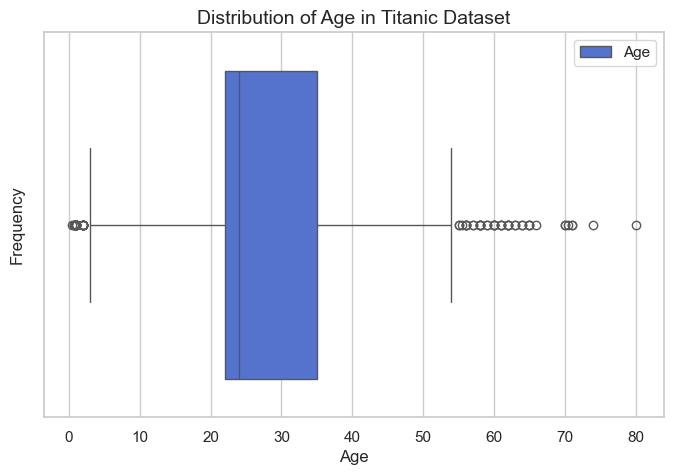

In [6]:
# Check is there any outliers in the dataset


# Set style for better visualization
sns.set(style="whitegrid")

# Create the boxplot with enhancements
plt.figure(figsize=(8, 5))
sns.boxplot(x=titanic['age'], color="royalblue")

# Add title and labels
plt.title("Distribution of Age in Titanic Dataset", fontsize=14)
plt.xlabel("Age", fontsize=12)
plt.ylabel("Frequency", fontsize=12)

# Add a legend (useful if multiple features)
plt.legend(["Age"], loc="upper right")

# Show plot
plt.show()


In [7]:
# Finding outliers in age column using IQR method

Q1 = titanic['age'].quantile(0.25)  # 25th percentile
Q3 = titanic['age'].quantile(0.75)  # 75th percentile
IQR = Q3 - Q1  # Interquartile Range

# Define bounds for outliers
lower_bound = Q1 - 1.5 * IQR
upper_bound = Q3 + 1.5 * IQR

# Find outliers
outliers = titanic[(titanic['age'] < lower_bound) | (titanic['age'] > upper_bound)]

# Remove outliers
titanic_iqr = titanic[(titanic['age'] >= lower_bound) & (titanic['age'] <= upper_bound)]


print("Number of Outliers:", outliers.shape[0])
print(f"Original dataset size: {titanic.shape[0]}")
print(f"After IQR outlier removal: {titanic_iqr.shape[0]}")



Number of Outliers: 66
Original dataset size: 891
After IQR outlier removal: 825


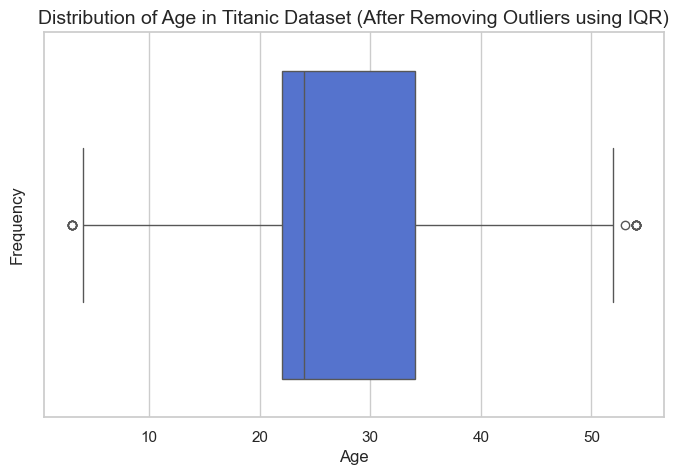

In [8]:
# Now, plot the updated boxplot
plt.figure(figsize=(8,5))
sns.boxplot(x=titanic_iqr['age'], color="royalblue")

# Improve plot aesthetics
plt.xlabel("Age", fontsize=12)
plt.ylabel("Frequency", fontsize=12)
plt.title("Distribution of Age in Titanic Dataset (After Removing Outliers using IQR)", fontsize=14)

# Show the plot
plt.show()

In [9]:
from scipy.stats import zscore

# Compute Z-scores
titanic['age_zscore'] = zscore(titanic['age'])

# Define threshold (Z-score > 3 or < -3 are outliers)
threshold = 3

outliers_z = titanic[abs(titanic['age_zscore']) > 3]  # Outliers with Z-score > 3
print("Number of Outliers using Z-score:", outliers_z.shape[0])

# Remove outliers
titanic_z = titanic[abs(titanic['age_zscore']) <= threshold]

print(f"Original dataset size: {titanic.shape[0]}")
print(f"After Z-score outlier removal: {titanic_z.shape[0]}")


Number of Outliers using Z-score: 7
Original dataset size: 891
After Z-score outlier removal: 884


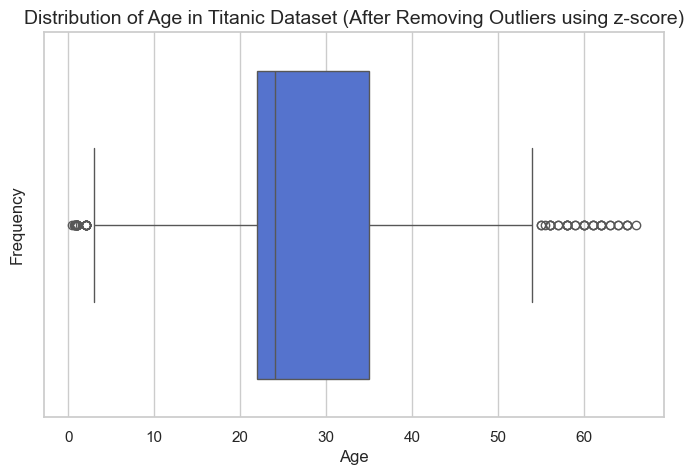

In [10]:
# Now, plot the updated boxplot
plt.figure(figsize=(8,5))
sns.boxplot(x=titanic_z['age'], color="royalblue")

# Improve plot aesthetics
plt.xlabel("Age", fontsize=12)
plt.ylabel("Frequency", fontsize=12)
plt.title("Distribution of Age in Titanic Dataset (After Removing Outliers using z-score)", fontsize=14)

# Show the plot
plt.show()

# **Feature Selection**

## **Correlation Heatmap (Univariate Technique)**

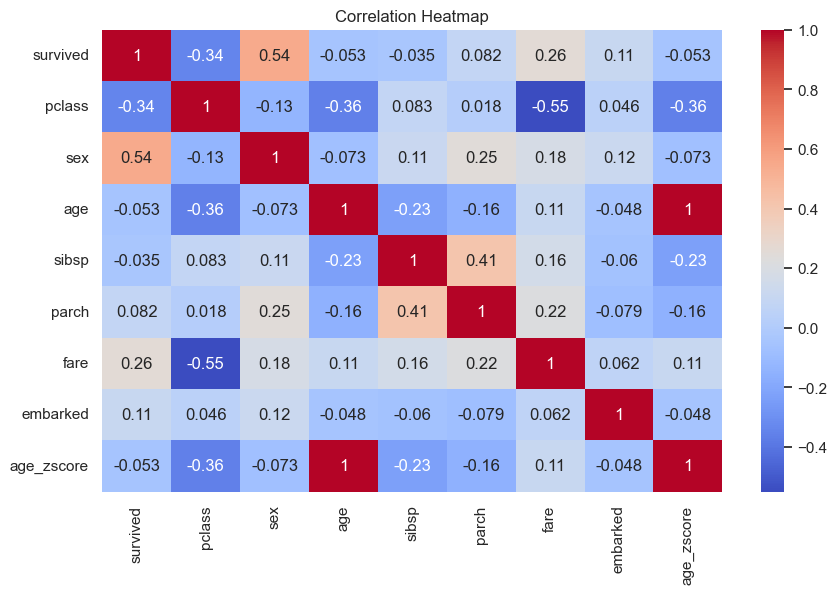

In [11]:
# Convert categorical to numeric where needed
titanic_encoded = titanic.copy()
titanic_encoded['sex'] = titanic_encoded['sex'].map({'male': 0, 'female': 1})
titanic_encoded['embarked'] = titanic_encoded['embarked'].map({'S': 0, 'C': 1, 'Q': 2})

# Drop non-numeric columns for correlation
numeric_cols = titanic_encoded.select_dtypes(include=['int64', 'float64']).columns

# Plot heatmap
plt.figure(figsize=(10,6))
sns.heatmap(titanic_encoded[numeric_cols].corr(), annot=True, cmap='coolwarm')
plt.title("Correlation Heatmap")
plt.show()

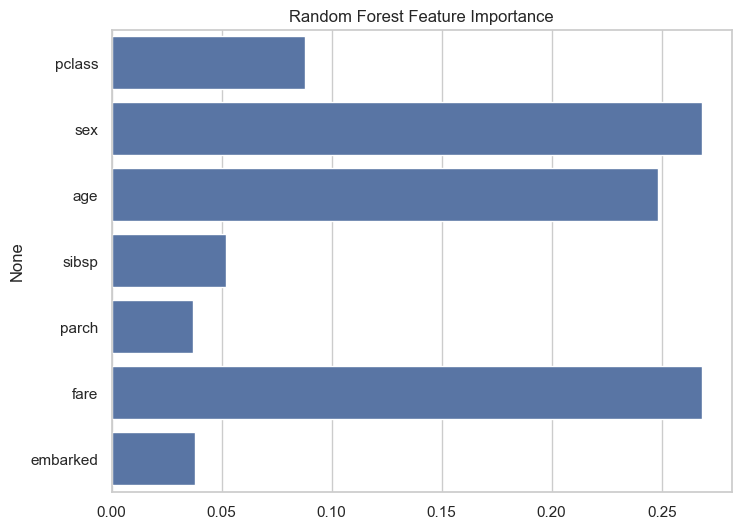

In [12]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import train_test_split

# Basic preprocessing
X = titanic_encoded[['pclass', 'sex', 'age', 'sibsp', 'parch', 'fare', 'embarked']]
y = titanic_encoded['survived']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Fit RandomForest
rf = RandomForestClassifier(random_state=42)
rf.fit(X_train, y_train)

# Feature Importances
importances = rf.feature_importances_

# Plot
plt.figure(figsize=(8,6))
sns.barplot(x=importances, y=X.columns)
plt.title("Random Forest Feature Importance")
plt.show()

c:\Users\FarhanArain\anaconda3\envs\datascience\lib\site-packages\xgboost\training.py:183: UserWarning: [12:42:00] WARNING: C:\actions-runner\_work\xgboost\xgboost\src\learner.cc:738: 
Parameters: { "use_label_encoder" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)


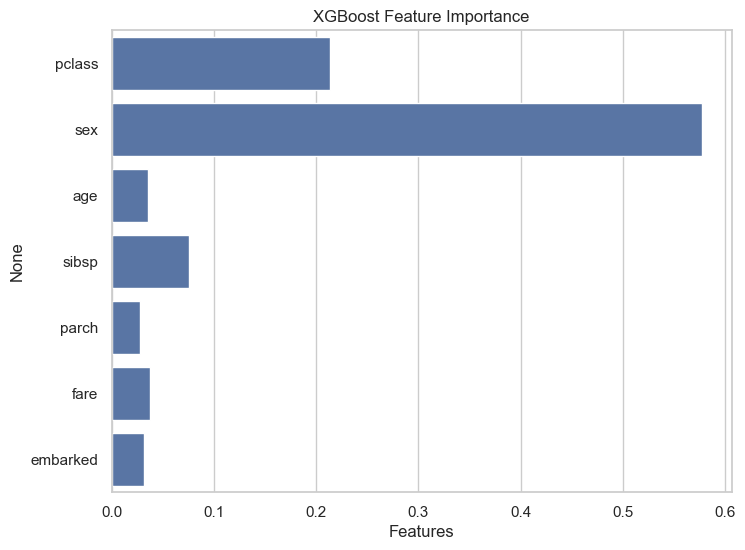

In [13]:
from xgboost import XGBClassifier

xgb = XGBClassifier(use_label_encoder=False, eval_metric='logloss')
xgb.fit(X_train, y_train)

# Plot importance
plt.figure(figsize=(8,6))
sns.barplot(x=xgb.feature_importances_, y=X.columns)
plt.title("XGBoost Feature Importance")
plt.xlabel("Features")
plt.show()


## **Univariate Feature Selection (Chi-squared Test)**

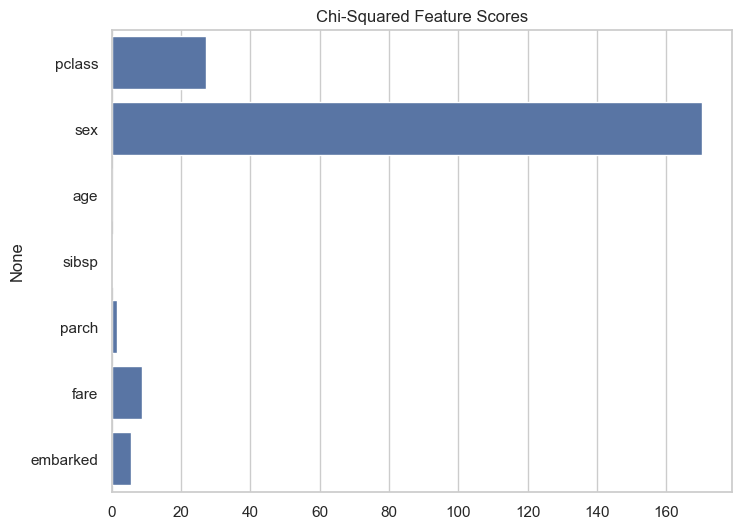

In [14]:
from sklearn.feature_selection import SelectKBest, chi2
from sklearn.preprocessing import MinMaxScaler

# Chi-squared requires non-negative values
X_scaled = MinMaxScaler().fit_transform(X)

# Apply test
selector = SelectKBest(score_func=chi2, k='all')
chi_scores = selector.fit(X_scaled, y)

# Plot
plt.figure(figsize=(8,6))
sns.barplot(x=chi_scores.scores_, y=X.columns)
plt.title("Chi-Squared Feature Scores")
plt.show()


## **RFE feature ranking**

Selected Features: Index(['pclass', 'sex', 'embarked'], dtype='object')
Feature Ranking: [1 1 4 2 3 5 1]


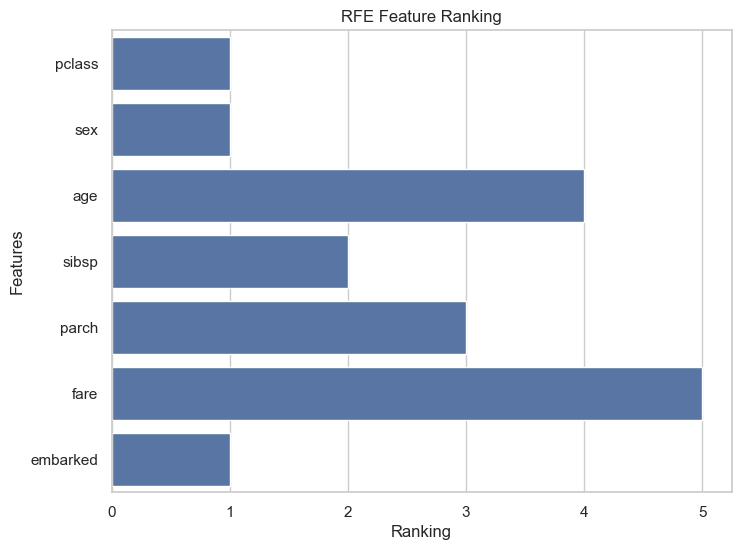

In [15]:
from sklearn.feature_selection import RFE
from sklearn.linear_model import LogisticRegression

# Recursive Feature Elimination
model = LogisticRegression(max_iter=1000)
rfe = RFE(model, n_features_to_select=3)
rfe = rfe.fit(X_train, y_train)
rfe_support = rfe.support_
rfe_ranking = rfe.ranking_
print("Selected Features:", X.columns[rfe_support])
print("Feature Ranking:", rfe_ranking)
# Plot RFE feature ranking
plt.figure(figsize=(8,6))
sns.barplot(x=rfe_ranking, y=X.columns)
plt.title("RFE Feature Ranking")
plt.xlabel("Ranking", fontsize=12)
plt.ylabel("Features", fontsize=12)
plt.show()

In [16]:
from sklearn.feature_selection import RFE
from sklearn.linear_model import LogisticRegression

# Use Logistic Regression as base estimator
log_reg = LogisticRegression(max_iter=1000)
rfe = RFE(estimator=log_reg, n_features_to_select=5)
rfe.fit(X_scaled, y)

# Display ranking (1 = selected)
rfe_ranking = pd.DataFrame({
    'Feature': X.columns,
    'Selected': rfe.support_,
    'Ranking': rfe.ranking_
})
print(rfe_ranking.sort_values(by='Ranking'))

    Feature  Selected  Ranking
0    pclass      True        1
1       sex      True        1
2       age      True        1
3     sibsp      True        1
5      fare      True        1
6  embarked     False        2
4     parch     False        3


## **PCA (Principal Component Analysis)**

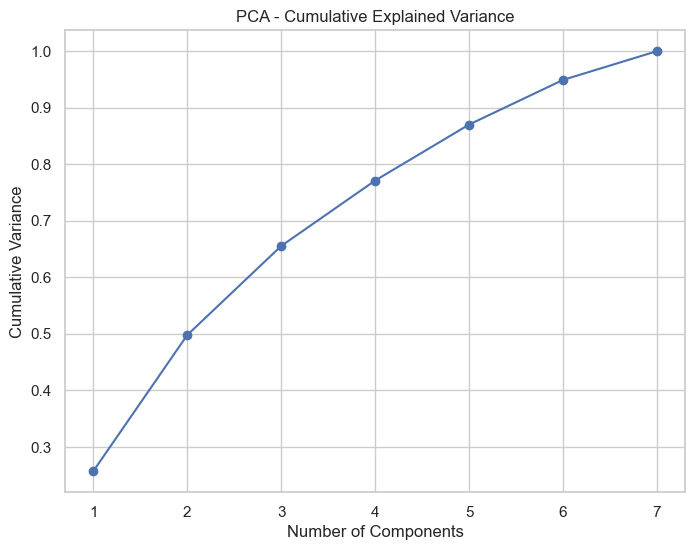

In [17]:
from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler

# Scale features
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

# Apply PCA
pca = PCA(n_components=None)  # Keep all components
X_pca = pca.fit_transform(X_scaled)

# Plot explained variance
plt.figure(figsize=(8,6))
plt.plot(range(1, len(pca.explained_variance_ratio_)+1), pca.explained_variance_ratio_.cumsum(), marker='o')
plt.title("PCA - Cumulative Explained Variance")
plt.xlabel("Number of Components")
plt.ylabel("Cumulative Variance")
plt.grid(True)
plt.show()

## **Cross-Validation for Model Performance Comparison**

In [18]:
import warnings
warnings.filterwarnings('ignore')  # Suppresses all warnings

from sklearn.model_selection import cross_val_score
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from xgboost import XGBClassifier

models = {
    'Logistic Regression': LogisticRegression(max_iter=1000),
    'Random Forest': RandomForestClassifier(random_state=42),
    'XGBoost': XGBClassifier(use_label_encoder=False, eval_metric='logloss')
}

print("Model Performance (CV Accuracy):\n")

for name, model in models.items():
    scores = cross_val_score(model, X_scaled, y, cv=5, scoring='accuracy')
    print(f"{name}: {scores.mean():.4f} ± {scores.std():.4f}")


Model Performance (CV Accuracy):

Logistic Regression: 0.7924 ± 0.0185
Random Forest: 0.8115 ± 0.0297
XGBoost: 0.8205 ± 0.0329


##### **XGBoost is the most accurate model on this dataset. We can tune its hyperparameters using GridSearchCV or RandomizedSearchCV for even better**

## **Build the neural network**

In [19]:
selected_features = ['pclass', 'sex', 'age', 'fare', 'embarked']  # or top features from RFE/PCA
X = titanic_encoded[selected_features]
y = titanic_encoded['survived']

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Scale
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)


In [20]:
# Building the model
input_layer = tf.keras.layers.Dense(10, activation='relu', input_shape=(X_train.shape[1],)) # input layer
# hidden_layer = tf.keras.layers.Dense(10, activation='relu') # hidden layer
output_layer = tf.keras.layers.Dense(1, activation='sigmoid') # output layer

model = tf.keras.models.Sequential([input_layer, 
                                    # hidden_layer, 
                                    output_layer])

# Compile the model
model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])

# Training the model and saving history
history = model.fit(X_train, y_train, epochs=100, batch_size=32, verbose=1, validation_data=(X_test, y_test))

# Evaluating the model
loss, accuracy = model.evaluate(X_test, y_test, verbose=1)
print(f"Test Accuracy: {accuracy}")
print(f"Test Loss: {loss}")

Epoch 1/100
23/23 ━━━━━━━━━━━━━━━━━━━━ 2s 17ms/step - accuracy: 0.5565 - loss: 0.6938 - val_accuracy: 0.6536 - val_loss: 0.6551
Epoch 2/100
23/23 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - accuracy: 0.6912 - loss: 0.6628 - val_accuracy: 0.7207 - val_loss: 0.6323
Epoch 3/100
23/23 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - accuracy: 0.7167 - loss: 0.6413 - val_accuracy: 0.7486 - val_loss: 0.6122
Epoch 4/100
23/23 ━━━━━━━━━━━━━━━━━━━━ 0s 9ms/step - accuracy: 0.7540 - loss: 0.6172 - val_accuracy: 0.7542 - val_loss: 0.5925
Epoch 5/100
23/23 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - accuracy: 0.7789 - loss: 0.5903 - val_accuracy: 0.7598 - val_loss: 0.5746
Epoch 6/100
23/23 ━━━━━━━━━━━━━━━━━━━━ 0s 10ms/step - accuracy: 0.7683 - loss: 0.5752 - val_accuracy: 0.7821 - val_loss: 0.5571
Epoch 7/100
23/23 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - accuracy: 0.7890 - loss: 0.5599 - val_accuracy: 0.7765 - val_loss: 0.5411
Epoch 8/100
23/23 ━━━━━━━━━━━━━━━━━━━━ 0s 9ms/step - accuracy: 0.8037 - loss: 0.5413 - val_accuracy: 0.7765 -

# **Accuracy vs Loss Plot**

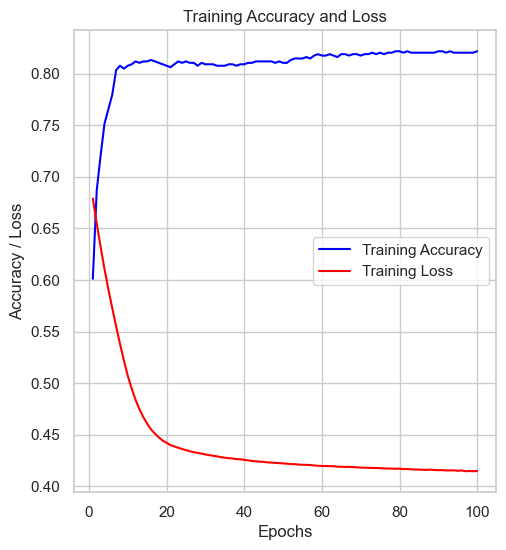

In [21]:
# Extract the history data
train_accuracy = history.history['accuracy']
train_loss = history.history['loss']
val_accuracy = history.history['val_accuracy']
val_loss = history.history['val_loss']
epochs = range(1, len(train_accuracy) + 1)

# Plot Training Accuracy vs Loss
plt.figure(figsize=(12, 6))
plt.subplot(1, 2, 1)  # (rows, cols, panel number)
plt.plot(epochs, train_accuracy, label='Training Accuracy', color='blue')
plt.plot(epochs, train_loss, label='Training Loss', color='red')
plt.title('Training Accuracy and Loss')
plt.xlabel('Epochs')
plt.ylabel('Accuracy / Loss')
plt.legend()


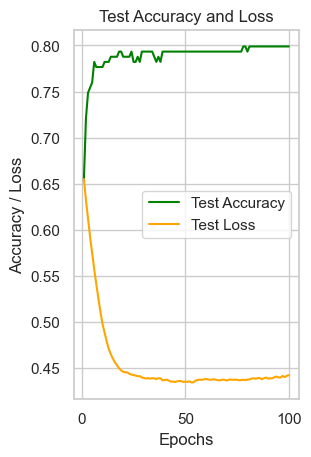

In [22]:
# Plot Test Accuracy vs Loss
plt.subplot(1, 2, 2)
plt.plot(epochs, val_accuracy, label='Test Accuracy', color='green')
plt.plot(epochs, val_loss, label='Test Loss', color='orange')
plt.title('Test Accuracy and Loss')
plt.xlabel('Epochs')
plt.ylabel('Accuracy / Loss')
plt.legend()

# # Show both plots
# plt.tight_layout()
# plt.show()

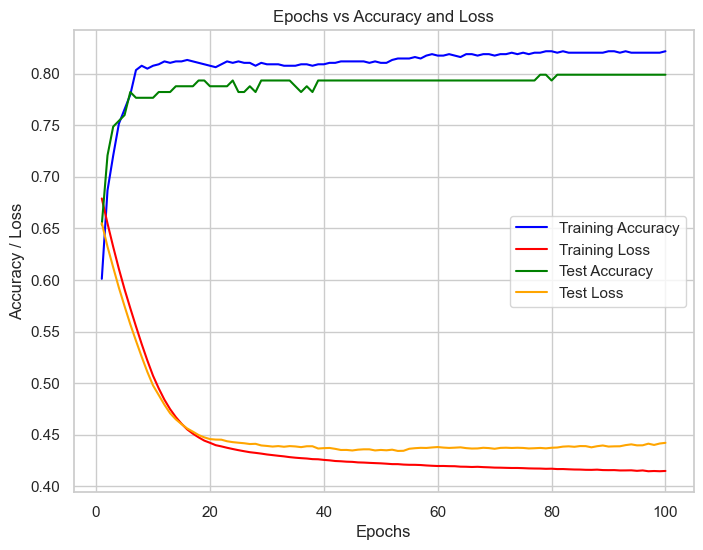

In [23]:
# Plot Epochs vs Accuracy and Loss on the same graph
plt.figure(figsize=(8, 6))
plt.plot(epochs, train_accuracy, label='Training Accuracy', color='blue')
plt.plot(epochs, train_loss, label='Training Loss', color='red')
plt.plot(epochs, val_accuracy, label='Test Accuracy', color='green')
plt.plot(epochs, val_loss, label='Test Loss', color='orange')
plt.title('Epochs vs Accuracy and Loss')
plt.xlabel('Epochs')
plt.ylabel('Accuracy / Loss')
plt.legend()
plt.show()

## **EarlyStopping method**

In [25]:
from tensorflow.keras.callbacks import EarlyStopping

# EarlyStopping callback
early_stopping = EarlyStopping(monitor='val_loss',    # You can also use 'val_accuracy' for accuracy
                               patience=10,            # Number of epochs with no improvement before stopping
                               restore_best_weights=True,  # Restore model weights from the epoch with the best validation loss
                               verbose=1)

# Train the model with EarlyStopping
history = model.fit(X_train, y_train, 
                    epochs=100, 
                    batch_size=32, 
                    validation_data=(X_test, y_test),
                    callbacks=[early_stopping],  # Use the EarlyStopping callback
                    verbose=1)


Epoch 1/100
23/23 ━━━━━━━━━━━━━━━━━━━━ 1s 22ms/step - accuracy: 0.8207 - loss: 0.4038 - val_accuracy: 0.7989 - val_loss: 0.4419
Epoch 2/100
23/23 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - accuracy: 0.8337 - loss: 0.4071 - val_accuracy: 0.7989 - val_loss: 0.4412
Epoch 3/100
23/23 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - accuracy: 0.8017 - loss: 0.4294 - val_accuracy: 0.7989 - val_loss: 0.4418
Epoch 4/100
23/23 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - accuracy: 0.8158 - loss: 0.4051 - val_accuracy: 0.7989 - val_loss: 0.4412
Epoch 5/100
23/23 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - accuracy: 0.8187 - loss: 0.4278 - val_accuracy: 0.8045 - val_loss: 0.4432
Epoch 6/100
23/23 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - accuracy: 0.8016 - loss: 0.4386 - val_accuracy: 0.8045 - val_loss: 0.4410
Epoch 7/100
23/23 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - accuracy: 0.8165 - loss: 0.4193 - val_accuracy: 0.7989 - val_loss: 0.4412
Epoch 8/100
23/23 ━━━━━━━━━━━━━━━━━━━━ 0s 9ms/step - accuracy: 0.8299 - loss: 0.4008 - val_accuracy: 0.7989 - 

In [26]:
# Building the model
input_layer = tf.keras.layers.Dense(10, activation='relu', input_shape=(X_train.shape[1],)) # input layer
# hidden_layer = tf.keras.layers.Dense(10, activation='relu') # hidden layer
output_layer = tf.keras.layers.Dense(1, activation='sigmoid') # output layer

model = tf.keras.models.Sequential([input_layer, 
                                    # hidden_layer, 
                                    output_layer])

# Compile the model
model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])

# Training the model and saving history
history = model.fit(X_train, y_train, epochs=16, batch_size=32, verbose=1, validation_data=(X_test, y_test))

# Evaluating the model
loss, accuracy = model.evaluate(X_test, y_test, verbose=1)
print(f"Test Accuracy: {accuracy}")
print(f"Test Loss: {loss}")

Epoch 1/16
23/23 ━━━━━━━━━━━━━━━━━━━━ 2s 35ms/step - accuracy: 0.3908 - loss: 0.7638 - val_accuracy: 0.4637 - val_loss: 0.7040
Epoch 2/16
23/23 ━━━━━━━━━━━━━━━━━━━━ 0s 10ms/step - accuracy: 0.4085 - loss: 0.7467 - val_accuracy: 0.5475 - val_loss: 0.6692
Epoch 3/16
23/23 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - accuracy: 0.5672 - loss: 0.6903 - val_accuracy: 0.6816 - val_loss: 0.6389
Epoch 4/16
23/23 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - accuracy: 0.6268 - loss: 0.6609 - val_accuracy: 0.7095 - val_loss: 0.6115
Epoch 5/16
23/23 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - accuracy: 0.6697 - loss: 0.6246 - val_accuracy: 0.7263 - val_loss: 0.5880
Epoch 6/16
23/23 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - accuracy: 0.7065 - loss: 0.6077 - val_accuracy: 0.7486 - val_loss: 0.5665
Epoch 7/16
23/23 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - accuracy: 0.7165 - loss: 0.5906 - val_accuracy: 0.7542 - val_loss: 0.5479
Epoch 8/16
23/23 ━━━━━━━━━━━━━━━━━━━━ 0s 10ms/step - accuracy: 0.7190 - loss: 0.5759 - val_accuracy: 0.7933 - val_lo

## **Accuracy vs Loss**

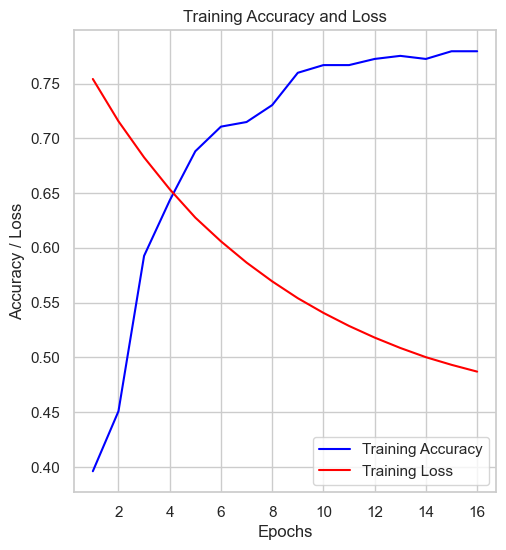

In [27]:
# Extract the history data
train_accuracy = history.history['accuracy']
train_loss = history.history['loss']
val_accuracy = history.history['val_accuracy']
val_loss = history.history['val_loss']
epochs = range(1, len(train_accuracy) + 1)

# Plot Training Accuracy vs Loss
plt.figure(figsize=(12, 6))
plt.subplot(1, 2, 1)  # (rows, cols, panel number)
plt.plot(epochs, train_accuracy, label='Training Accuracy', color='blue')
plt.plot(epochs, train_loss, label='Training Loss', color='red')
plt.title('Training Accuracy and Loss')
plt.xlabel('Epochs')
plt.ylabel('Accuracy / Loss')
plt.legend()


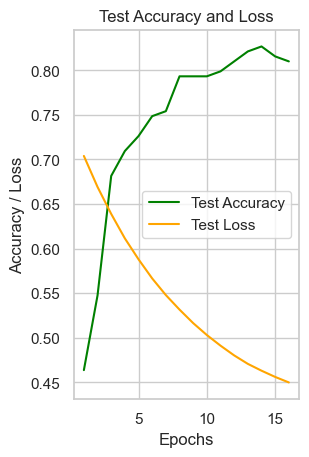

In [28]:
# Plot Test Accuracy vs Loss
plt.subplot(1, 2, 2)
plt.plot(epochs, val_accuracy, label='Test Accuracy', color='green')
plt.plot(epochs, val_loss, label='Test Loss', color='orange')
plt.title('Test Accuracy and Loss')
plt.xlabel('Epochs')
plt.ylabel('Accuracy / Loss')
plt.legend()

# # Show both plots
# plt.tight_layout()
# plt.show()

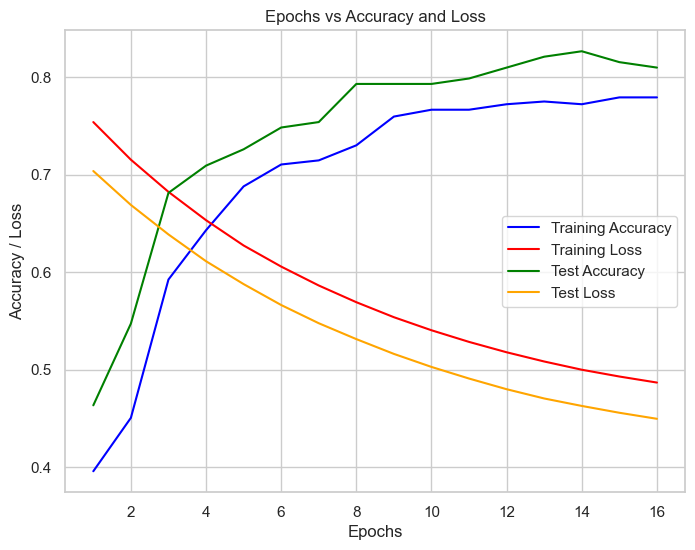

In [29]:
# Plot Epochs vs Accuracy and Loss on the same graph
plt.figure(figsize=(8, 6))
plt.plot(epochs, train_accuracy, label='Training Accuracy', color='blue')
plt.plot(epochs, train_loss, label='Training Loss', color='red')
plt.plot(epochs, val_accuracy, label='Test Accuracy', color='green')
plt.plot(epochs, val_loss, label='Test Loss', color='orange')
plt.title('Epochs vs Accuracy and Loss')
plt.xlabel('Epochs')
plt.ylabel('Accuracy / Loss')
plt.legend()
plt.show()